In [62]:
import pandas as pd
df = pd.read_csv("C:\\Users\\HP\\Downloads\\ElectricCarData_Clean.csv")

In [63]:
df.head(100)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Volkswagen,ID.3 Pro Performance,7.3,160,340,171,470,Yes,RWD,Type 2 CCS,Hatchback,C,5,35575
96,Kia,e-Soul 39 kWh,9.9,157,230,170,220,Yes,FWD,Type 2 CCS,SUV,B,5,33133
97,Byton,M-Byte 72 kWh 2WD,7.5,190,325,222,420,Yes,RWD,Type 2 CCS,SUV,E,5,53500
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000


In [64]:
df["PowerTrain"].unique()

array(['AWD', 'RWD', 'FWD'], dtype=object)

In [65]:
df.drop("Model",axis=1,inplace=True)

In [66]:
df.drop("Brand",axis=1,inplace=True)

In [67]:
df

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...
98,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [68]:
df.drop("PriceEuro",axis=1,inplace=True)

In [69]:
df["RapidCharge"].replace("Yes","1",inplace=True)

In [70]:
df["RapidCharge"].replace("No","0",inplace=True)

In [71]:
from sklearn.model_selection import train_test_split
X,y = train_test_split(df,test_size=0.2,random_state=42)

In [72]:
label = X["BodyStyle"]
X.drop("BodyStyle",axis=1,inplace=True)
X.drop("FastCharge_KmH",axis=1,inplace=True)

In [73]:
label = (label == "Sedan")

In [80]:
X["PowerTrain"] = (pd.Categorical(X["PowerTrain"])).codes

In [83]:
X["PlugType"] = (pd.Categorical(X["PlugType"])).codes
X["Segment"] = (pd.Categorical(X["Segment"])).codes

In [84]:
X

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,RapidCharge,PowerTrain,PlugType,Segment,Seats
53,8.8,160,420,183,1,2,2,2,5
22,10.0,160,290,179,1,2,2,2,5
68,22.4,130,160,194,0,1,1,6,5
44,12.3,130,195,166,1,1,2,0,4
98,7.5,160,330,191,1,1,2,2,5
...,...,...,...,...,...,...,...,...,...
71,7.0,160,400,193,1,0,2,2,5
14,9.7,165,250,153,1,1,2,2,5
92,7.9,167,365,175,1,1,2,1,5
51,2.1,410,970,206,1,0,2,7,4


In [85]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
sgd_clf = SGDClassifier(random_state=42)
y_scores = cross_val_predict(sgd_clf,X,label,cv=3,method="decision_function")

In [86]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(label,y_scores)

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds,recall[:-1],"g-",label="Recall")

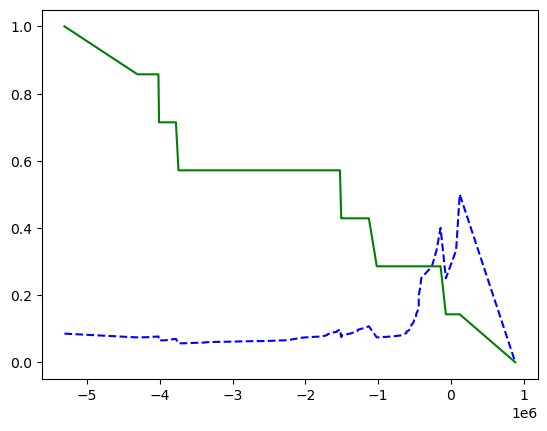

In [90]:
plot_precision_recall_vs_threshold(precision,recall,thresholds)
plt.show()

In [99]:
import numpy as np
threshold_90_precision = thresholds[np.argmax(precision >= 0.50)]

In [101]:
from sklearn.metrics import precision_score,recall_score
predict = (y_scores >= threshold_90_precision)


In [102]:
precision_score(label,predict)

0.5

In [103]:
recall_score(label,predict)

0.14285714285714285

In [104]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(label,y_scores)

[]

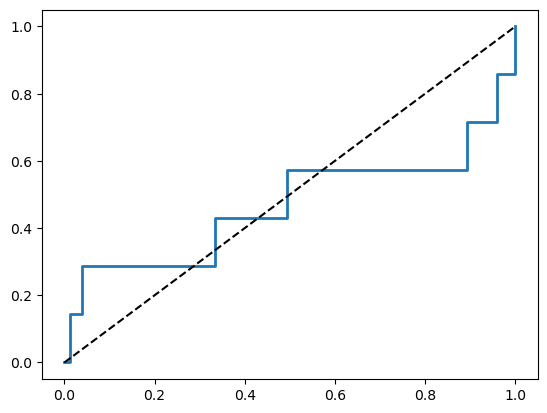

In [105]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    
plot_roc_curve(fpr,tpr)    
plt.plot()

In [106]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(label,y_scores))

0.4666666666666666
